# MNIST Tensor flow example
E. Krupczak - 18 Aug 2018

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Import mnist data, which comes with tensor flow
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Components of MNIST
- mnist.train
- mnist.test
- mnist.validation
Each with images and labels

In [4]:
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [5]:
mnist.train.labels.shape

(55000, 10)

In [20]:
#This is a six
mnist.train.labels[600]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

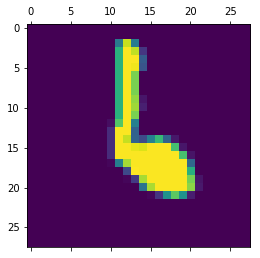

In [19]:
#this is the first image
plt.matshow(mnist.train.images[600].reshape((28,-1)))

In [24]:
# Function to make weight and bias variables
# Number of weight variables: 784*number of nodes in next layer
# Number of bias (i.e. offset/intercept) variables: number of nodes in next layer

def weight_variable(shape):
    '''For matrix multiplication in fully-connected layers, weight variable shape is: input size * output size.'''
    #Normally distributed variables clamped between 0-1 with stddev as given
    initial = tf.truncated_normal(shape, stddev=0.1)
    #Return variable node
    return tf.Variable(initial)

def bias_variable(shape):
    ''' Bias variable shape is number of loads in next layer. '''
    #Slightly positive so we preserve more gradients for RELU non-linearity 
    initial = tf.constant(0.1, shape = shape)
    return tf.Variable(initial)

In [53]:
#input placeholder - 28x28 represented as a 784-length vector
input_ph = tf.placeholder(tf.float32, shape=[None,28*28], name = 'input_ph')
#output placeholder - a 10-length vector containing logits
output_ph = tf.placeholder(tf.float32, shape=[None,10], name = 'output_ph')

#flow stores current node as we process through the layers
#Starts by pointing to placeholder node for input
flow = input_ph

#Make some layers
def make_layer(n):
    global flow
    #Use the shape of the previous layer to make the weight variable for the next
    w1 = weight_variable((int(flow.shape[-1]), n))
    b1 = bias_variable((n,))
    #right-multiply by the weight
    #flow points to computational node
    flow = tf.matmul(flow,w1)+b1
    
def make_nonlinearity():
    '''rectified linear'''
    global flow
    #updates computational node held by flow
    flow = tf.nn.relu(flow)
    
#Intersperse nonlinearity between the affine layers
#Layer 1 - 100 nodes
make_layer(100)
make_nonlinearity()
#Layer 2 - 50 nodes
make_layer(50)
make_nonlinearity()
#Layer 3 (output) - 10 nodes
make_layer(10)

network_output = flow

#Make loss computational node (returns loss as a number)
loss = tf.reduce_mean((output_ph - network_output)**2)

#Gradient descent with 'GradientDescentOptimizer'
learning_rate = 0.1
#make training step computational node (has only side effects; returns none)
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#Make a new session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [54]:
loss_list = []

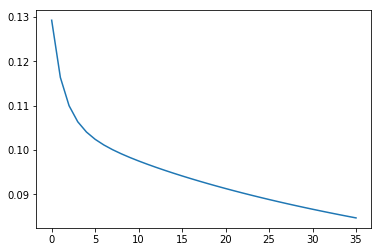

In [67]:
feed_dict={
    input_ph: mnist.train.images,
    output_ph: mnist.train.labels,
}

for i in range(3):
    loss_list.append(sess.run(loss, feed_dict=feed_dict))
    sess.run(train_step, feed_dict=feed_dict)
    
plt.plot(loss_list)

In [70]:
model_output = sess.run(network_output, feed_dict={
    input_ph:mnist.train.images[0:10],
})

In [72]:
model_output[0]

array([-0.18932825,  0.13026801,  0.2668326 , -0.27009872,  0.29890332,
        0.0869771 ,  0.4122665 ,  0.04909744,  0.2558691 ,  0.33011308],
      dtype=float32)

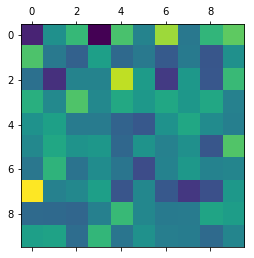

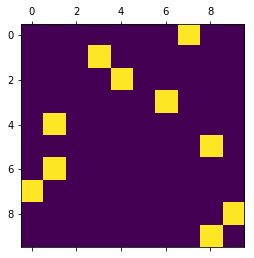

In [84]:
plt.matshow(model_output)
plt.matshow(mnist.train.labels[0:10])